## Heart Failure Prediction

Dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


#### prepare train/validation/test dataframe

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

In [7]:
numerical = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

In [8]:
categorical = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope']

## EDA

In [9]:
df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
st_slope                 int64
target                   int64
dtype: object

In [10]:
df.head().T

,0,1,2,3,4
age,40.0,49.0,37.0,48.0,54.0
sex,1.0,0.0,1.0,0.0,1.0
chest_pain_type,2.0,3.0,2.0,4.0,3.0
resting_bp_s,140.0,160.0,130.0,138.0,150.0
cholesterol,289.0,180.0,283.0,214.0,195.0
fasting_blood_sugar,0.0,0.0,0.0,0.0,0.0
resting_ecg,0.0,0.0,1.0,0.0,0.0
max_heart_rate,172.0,156.0,98.0,108.0,122.0
exercise_angina,0.0,0.0,0.0,1.0,0.0
oldpeak,0.0,1.0,0.0,1.5,0.0


In [11]:
df.shape

(1190, 12)

In [12]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [13]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

In [14]:
df.target.value_counts(normalize=False)

1    629
0    561
Name: target, dtype: int64

#### feature importance analysis

In [15]:
import seaborn as sns

In [16]:
corr_matrix = df.corr()
corr_matrix

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain_type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting_bp_s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting_blood_sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting_ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max_heart_rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


<AxesSubplot:>

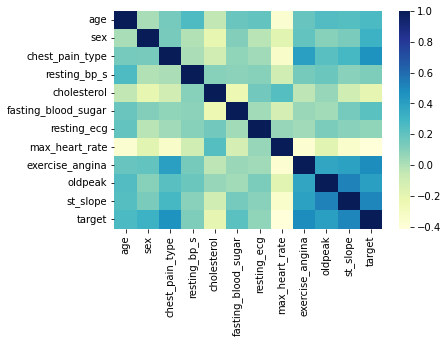

In [17]:
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [18]:
df_full_train[numerical].corrwith(df_full_train.target).abs().sort_values(ascending=False)

max_heart_rate    0.428670
oldpeak           0.404741
age               0.263758
cholesterol       0.190729
resting_bp_s      0.127691
dtype: float64

#### Mutual information

In [19]:
from sklearn.metrics import mutual_info_score

In [20]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.target)

In [21]:
mi = df_full_train[categorical].apply(mutual_info_target_score)
mi.sort_values(ascending=False)

st_slope               0.172835
chest_pain_type        0.140710
exercise_angina        0.121613
sex                    0.049367
fasting_blood_sugar    0.018334
resting_ecg            0.007952
dtype: float64

## Model training
Trained multiple models (linear and tree-based)

#### Use Scikit-Learn to encode categorical features

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
dv = DictVectorizer(sparse=False)

In [24]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [25]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.fit_transform(val_dicts)

### Training logistic regression with Scikit-Learn

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [27]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

0.7811440677966102

### Training XGBoost model

In [29]:
import xgboost as xgb

In [30]:
features = dv.get_feature_names() 
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [140]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 2,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

[08:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [141]:
y_pred = model.predict(dval)

In [142]:
roc_auc_score(y_val, y_pred)

0.8754590395480226

### XGBoost parameter tuning
Tuning the following parameters:

   * eta
   * max_depth
   * min_child_weight

In [143]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [144]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [145]:
scores = {}

In [158]:
%%capture output

xgb_params = {
    'eta': 0.6, # 0.01, 0.1, 0.3, 0.4, 0.6
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [159]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.6'

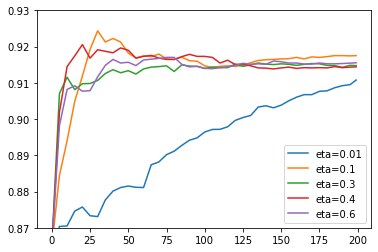

In [160]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.87, 0.93)
plt.legend()

In [161]:
scores = {}

In [200]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 8, # 1,2,3,4,5,6,7,8
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [201]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=8'

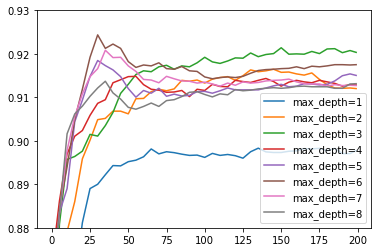

In [202]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.88, 0.93)
plt.legend()

In [203]:
scores = {}

In [210]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,  # 1, 10, 30
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [211]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

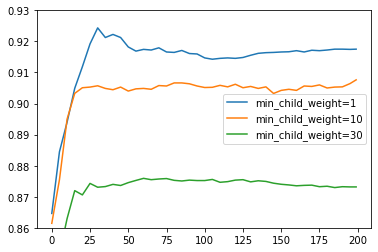

In [212]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.86, 0.93)
plt.legend()

#### Training the final model

In [213]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=65)

In [214]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.917725988700565

In [215]:
df_full_train = df_full_train.reset_index(drop=True)

In [217]:
y_full_train = df_full_train.target.values

In [218]:
del df_full_train['target']

In [219]:
dicts_full_train = df_full_train.to_dict(orient='records')

# dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [220]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [221]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [222]:
y_pred = model.predict(dtest)

In [223]:
roc_auc_score(y_test, y_pred)

0.9855288359225367